# FoldAR
##### Ian Brown, Tani Cath, Tom Cavey
##### Colorado State University
##### CS567 3D User Interfaces

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Constants
all_columns = ['thumbTip.x', 'thumbTip.y', 'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x', 'thumbCMC.y',
                  'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y', 'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y',
                  'indexTip.x', 'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y', 'indexMCP.x', 'indexMCP.y',
                  'indexTip2.x', 'indexTip2.y', 'indexPIP2.x', 'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x', 'indexMCP2.y',
                  'middleTip.x', 'middleTip.y', 'middlePIP.x', 'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x', 'middleMCP.y',
                  'middleTip2.x', 'middleTip2.y', 'middlePIP2.x', 'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x', 'middleMCP2.y',
                  'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y', 'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y',
                  'ringTip2.x', 'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y', 'ringDIP2.x', 'ringDIP2.y', 'ringMCP2.x', 'ringMCP2.y',
                  'littleTip.x', 'littleTip.y', 'littlePIP.x', 'littlePIP.y', 'littleDIP.x', 'littleDIP.y', 'littleMCP.x', 'littleMCP.y',
                  'littleTip2.x', 'littleTip2.y', 'littlePIP2.x', 'littlePIP2.y', 'littleDIP2.x', 'littleDIP2.y', 'littleMCP2.x', 'littleMCP2.y']


finger_columns = ['thumbTip', 'thumbIP', 'thumbMP', 'thumbCMC', 'thumbTip2', 'thumbIP2', 'thumbMP2', 'thumbCMC2',
                  'indexTip', 'indexPIP', 'indexDIP', 'indexMCP', 'indexTip2', 'indexPIP2', 'indexDIP2', 'indexMCP2',
                  'middleTip', 'middlePIP', 'middleDIP', 'middleMCP', 'middleTip2', 'middlePIP2', 'middleDIP2', 'middleMCP2',
                  'ringTip', 'ringPIP', 'ringDIP', 'ringMCP', 'ringTip2', 'ringPIP2', 'ringDIP2', 'ringMCP2',
                  'littleTip', 'littlePIP', 'littleDIP', 'littleMCP', 'littleTip2', 'littlePIP2', 'littleDIP2', 'littleMCP2']

fingertip_columns = [
    'thumbTip.x', 'thumbTip.y', 'thumbTip2.x', 'thumbTip2.y',
    'indexTip.x', 'indexTip.y', 'indexTip2.x', 'indexTip2.y',
    'middleTip.x', 'middleTip.y', 'middleTip2.x', 'middleTip2.y',
    'ringTip.x', 'ringTip.y', 'ringTip2.x', 'ringTip2.y',
    'littleTip.x', 'littleTip.y', 'littleTip2.x', 'littleTip2.y'
]


In [15]:
def get_files(dir='Data'):
    files = [(f) for f in os.listdir(dir) if os.path.isfile(f'{dir}/{f}')]
    return files
    
def read_file(filename: str, dir:str='Data'):
    df = pd.read_csv(f'{dir}/{filename}')
    # stripping spaces from columns an data...
    df.columns = df.columns.str.strip()
    
    df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

    # check columns are stripped
    # print(df.columns)
    
    return df, df.columns

    

In [18]:
files = get_files()

for f in files:
    print(f)
    data = read_file(filename=f)[0]
    print(data)

sessionData-102-0.csv
     pid  mode  frame        date          time  thumbTip.x  thumbTip.y  \
0    102     0      0  2023-11-22  19:23:56.913  331.845724  184.350784   
1    102     0      1  2023-11-22  19:23:56.945  331.769063  184.491274   
2    102     0      2  2023-11-22  19:23:56.971  331.430365  184.955303   
3    102     0      3  2023-11-22  19:23:57.006  331.721622  183.631149   
4    102     0      4  2023-11-22  19:23:57.036  327.776575  183.183837   
..   ...   ...    ...         ...           ...         ...         ...   
698  102     0    698  2023-11-22  19:24:21.577  420.961903  243.011313   
699  102     0    699  2023-11-22  19:24:21.610  422.075684  241.641319   
700  102     0    700  2023-11-22  19:24:21.642  421.659381  239.746269   
701  102     0    701  2023-11-22  19:24:21.676  423.717481  239.980502   
702  102     0    702  2023-11-22  19:24:21.711  424.854677  238.662629   

      thumbIP.x   thumbIP.y   thumbMP.x  ...  littleMCP.x  littleMCP.y  \
0  

In [20]:
def get_means(data):
    timestamps   = []
    frame_means  = []
    tip_means    = []
    finger_means = []
    
    for i, frame in data.groupby('frame'):
        timestamp_datetime = datetime.strptime(frame['time'].iloc[0], '%H:%M:%S.%f')
        timestamps.append(timestamp_datetime)
        # Euclidean distances
        # all points
        distances = np.sqrt(np.diff(frame[all_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)

        # tips
        tipDistances = np.sqrt(np.diff(frame[fingertip_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)
        
        # calc statistics for each frame
        frame_mean = np.mean(distances)
        tip_mean = np.mean(tipDistances)
        frame_means.append(frame_mean)
        tip_means.append(tip_mean)
        
    return frame_means, tip_means
         

In [ ]:
def print_frame(i, frame):
    timestamp_datetime = datetime.strptime(frame['date'].iloc[0] + " " + frame['time'].iloc[0], '%H:%M:%S.%f')
    distances = np.sqrt(np.diff(frame[all_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)
    tipDistances = np.sqrt(np.diff(frame[fingertip_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)
    
    frame_mean = np.mean(distances)
    tip_mean = np.mean(tipDistances)
    
    print(f'Frame {i}:')
    print(f'Timestamp: {timestamp_datetime}')
    print(f'Mean Distance: {frame_mean:.2f}')
    
    return frame_mean, tip_mean
    

In [ ]:


def print_frames(data):

    frame_means  = []
    tip_means    = []
    finger_means = []

    # for each frame in dataframe
    for i, frame in data.groupby('frame'):
        timestamp_datetime = datetime.strptime(frame['time'].iloc[0], '%H:%M:%S.%f')

        # Euclidean distances
        # all points
        distances = np.sqrt(np.diff(frame[all_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)

        #tips
        tipDistances = np.sqrt(np.diff(frame[fingertip_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)

        # individual fingers
        #fingerDistances =

        # calc statistics for each frame
        frame_mean = np.mean(distances)
        tip_mean = np.mean(tipDistances)
        frame_means.append(frame_mean)
        tip_means.append(tip_mean)
        # frame_min = np.min(distances[distances > 0])
        # frame_max = np.max(distances)
        # frame_std = np.std(distances)


        # CURRENT PLOTS
        # plt.figure(i)
        # plt.title(f'Frame {i}')
        # for j, finger in enumerate(finger_columns):
        #     color = plt.cm.magma(j / len(finger_columns))
        #     plt.plot(frame[f"{finger}.x"], frame[f"{finger}.y"], 'o', label=finger, color=color)
        # plt.show()

        # for fingertip in fingertip_columns:
        #     color = plt.cm.magma(len(fingertip_columns) - fingertip_columns.index(fingertip) - 1)
        #     plt.plot(frame[f'{fingertip}'], frame[f'{fingertip}'], 'o', label=fingertip, color=color)
        # plt.show()

        window_size = 5
        all_moving_average = np.convolve(frame_means, np.ones(window_size)/window_size, mode='valid')
        tips_moving_average = np.convolve(tip_means, np.ones(window_size)/window_size, mode='valid')


        print(f'Frame {i}:')
        print(f'Timestamp: {timestamp_datetime}')
        print(f'Mean Distance: {frame_mean:.2f}')
        # print(f'Minimum Distance: {frame_min:.2f}')
        # print(f'Maximum Distance: {frame_max:.2f}')
        # print(f'Standard Deviation: {frame_std:.2f}')
        print()


In [21]:
data = read_file('sessionData-300-0.csv')[0]

print_frames(data)

Frame 0:
Timestamp: 1900-01-01 10:16:34.116000
Mean Distance: 79.40

Frame 1:
Timestamp: 1900-01-01 10:16:34.338000
Mean Distance: 79.71

Frame 2:
Timestamp: 1900-01-01 10:16:34.609000
Mean Distance: 79.54

Frame 3:
Timestamp: 1900-01-01 10:16:34.851000
Mean Distance: 79.65

Frame 4:
Timestamp: 1900-01-01 10:16:35.081000
Mean Distance: 78.93

Frame 5:
Timestamp: 1900-01-01 10:16:35.314000
Mean Distance: 79.48

Frame 6:
Timestamp: 1900-01-01 10:16:35.545000
Mean Distance: 78.79

Frame 7:
Timestamp: 1900-01-01 10:16:35.782000
Mean Distance: 79.57

Frame 8:
Timestamp: 1900-01-01 10:16:36.018000
Mean Distance: 81.72

Frame 9:
Timestamp: 1900-01-01 10:16:36.257000
Mean Distance: 78.83

Frame 10:
Timestamp: 1900-01-01 10:16:36.490000
Mean Distance: 81.71

Frame 11:
Timestamp: 1900-01-01 10:16:36.721000
Mean Distance: 82.29

Frame 12:
Timestamp: 1900-01-01 10:16:36.968000
Mean Distance: 80.55

Frame 13:
Timestamp: 1900-01-01 10:16:37.200000
Mean Distance: 65.74

Frame 14:
Timestamp: 1900-01-0

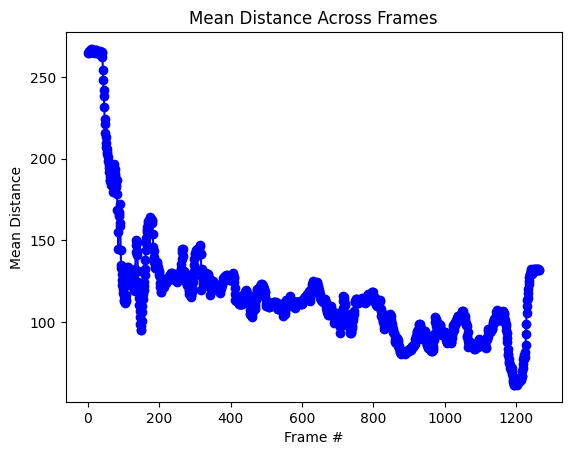

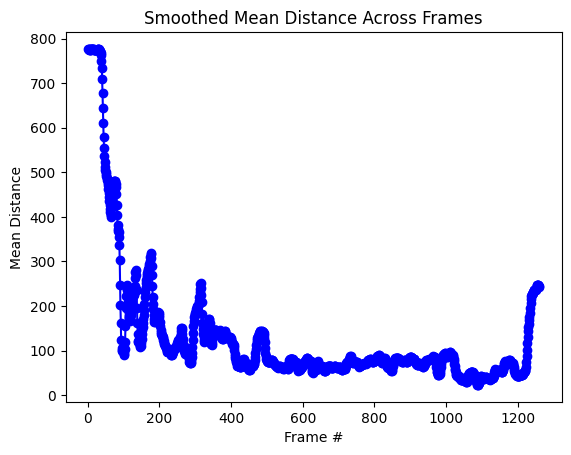

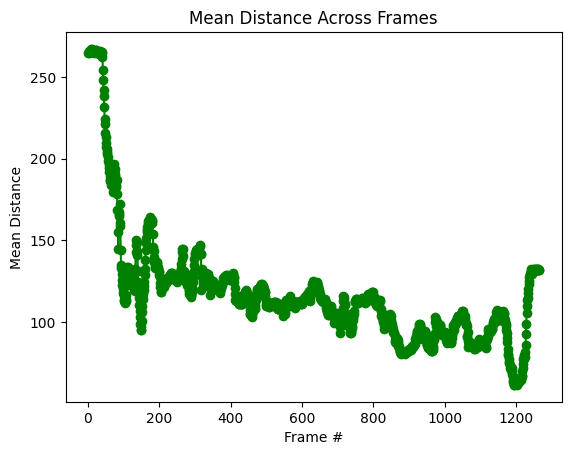

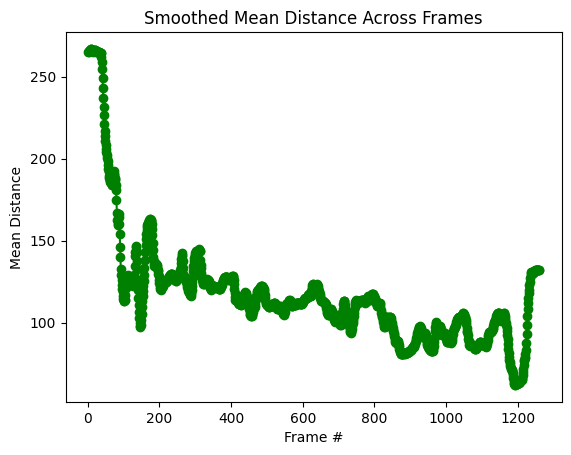

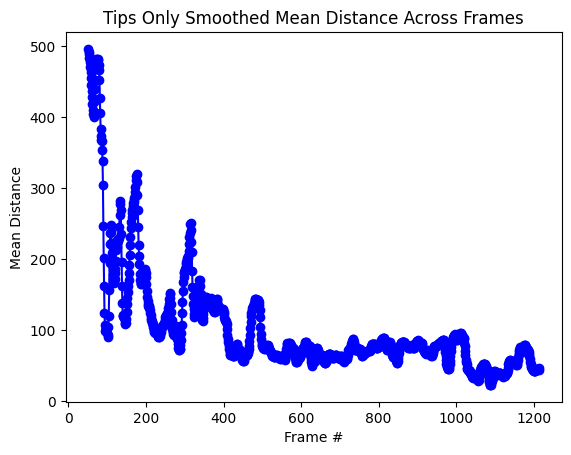

In [2]:
plt.plot(range(1, len(tip_means) + 1), frame_means, marker='o', linestyle='-', color='b')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Mean Distance Across Frames')
plt.show()

plt.plot(range(1, len(tip_means) + 1)[:len(tips_moving_average)], tips_moving_average, marker='o', linestyle='-', color='b')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Smoothed Mean Distance Across Frames')
plt.show()

plt.plot(range(1, len(frame_means) + 1), frame_means, marker='o', linestyle='-', color='g')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Mean Distance Across Frames')
plt.show()

plt.plot(range(1, len(frame_means) + 1)[:len(all_moving_average)], all_moving_average, marker='o', linestyle='-', color='g')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Smoothed Mean Distance Across Frames')
plt.show()

start_frame, end_frame = 50, 50
trimmed_tip_means = tip_means[start_frame:-end_frame]
trimmed_tips_moving_average = tips_moving_average[start_frame:end_frame + len(trimmed_tip_means)]

plt.plot(range(start_frame + 1, start_frame + 1 + len(trimmed_tip_means)), trimmed_tips_moving_average, marker='o', linestyle='-', color='b')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Tips Only Smoothed Mean Distance Across Frames')
plt.show()

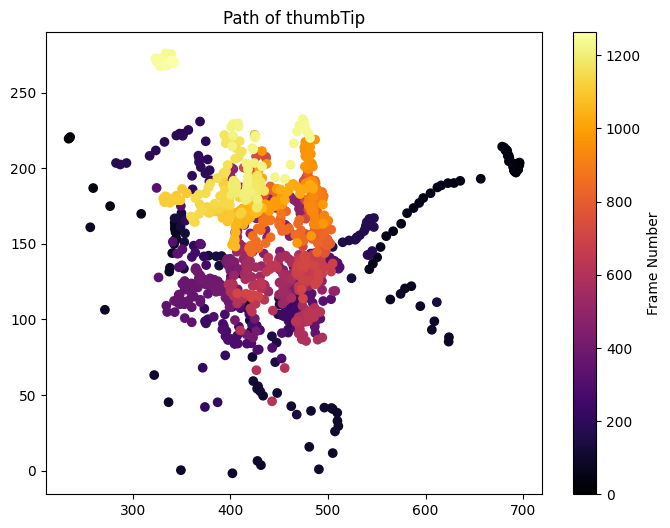

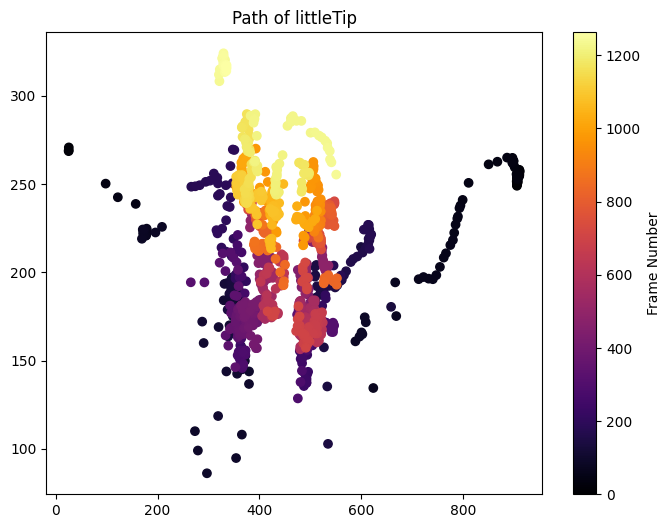

In [3]:
point_to_plot = 'thumbTip'
x_coords = df[f'{point_to_plot}.x']
y_coords = df[f'{point_to_plot}.y']

plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, label=f'{point_to_plot} Path', c=range(len(x_coords)), cmap='inferno')

plt.title(f'Path of {point_to_plot}')
plt.colorbar(label='Frame Number')
# plt.grid(True)
plt.show()


point_to_plot = 'littleTip'
x_coords = df[f'{point_to_plot}.x']
y_coords = df[f'{point_to_plot}.y']

plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, label=f'{point_to_plot} Path', c=range(len(x_coords)), cmap='inferno')

plt.title(f'Path of {point_to_plot}')
plt.colorbar(label='Frame Number')
# plt.grid(True)
plt.show()

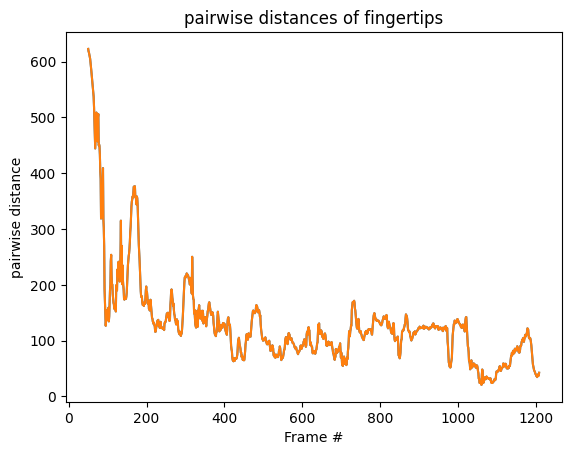

In [4]:
# read and remove starting and ending frames from CSV
# (this contains the starting and ending positions of the experiment)
df = pd.read_csv('sessionData-200_7-0.csv')
df = df[50:-55]

# strip any whitespace from columns and data
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# columns to plot
fingertip_columns = ['littleTip', 'littleTip2']

# pairwise euclidean distances (using fingertips)
for fingertip1 in fingertip_columns:
    for fingertip2 in fingertip_columns:
        if fingertip1 != fingertip2:
            df[f'{fingertip1}_{fingertip2}_distance'] = np.sqrt((df[f'{fingertip1}.x'] - df[f'{fingertip2}.x'])**2 +
                                                                (df[f'{fingertip1}.y'] - df[f'{fingertip2}.y'])**2)
#plots
for fingertip1 in fingertip_columns:
    for fingertip2 in fingertip_columns:
        if fingertip1 != fingertip2:
            distance_column = f'{fingertip1}_{fingertip2}_distance'
            plt.plot(df['frame'], df[distance_column], label=f'{fingertip1} to {fingertip2}')

plt.xlabel('Frame #')
plt.ylabel('pairwise distance')
plt.title('pairwise distances of fingertips')
plt.show()